In [1]:
from Predictor import ServerChainPredictor
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
sc_predictor = ServerChainPredictor()
sc_predictor.load('predictions/sc_predictor_80_05')

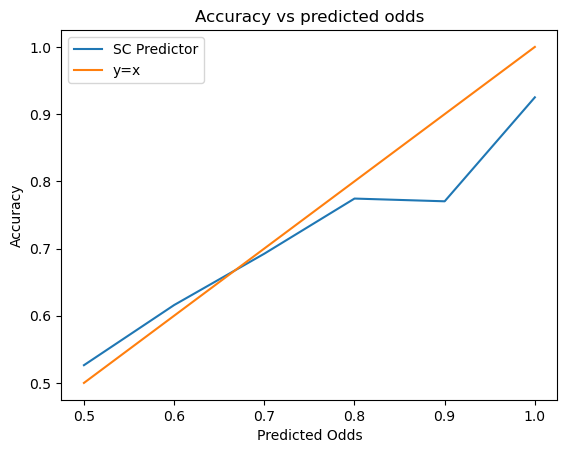

In [ ]:
#Are the predicted odds related to the accuracy?
hashmap = {i:[0,0,0] for i in range(5, 11)}
for idx, row in sc_predictor.raw_data.iterrows():
    p = row['p']
    if p > 0.5:
        bucket = int(p*10)
    else:
        bucket = int((1-p)*10)

    if row['prediction'] == row['true']:
        hashmap[bucket][0] += 1
    hashmap[bucket][1] += 1
    hashmap[bucket][2] = hashmap[bucket][0] / hashmap[bucket][1]

import matplotlib.pyplot as plt
plt.plot([i/10 for i in hashmap.keys()], [i[2] for i in hashmap.values()], label = 'SC Predictor')
plt.plot([i/10 for i in range(5, 11)], [i/10 for i in range(5,11)], label = 'y=x')
plt.title('Accuracy vs predicted odds')
plt.xlabel('Predicted Odds')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')